## Esercitazione uno
### Deep Learning

Introduzione al `python3`:
- introduzione generale alle strutture dati e alle librerie;
- introduzione alle classi (interessante).
- fare attenzione alle variabili: jupyter notebook salva tutto in memoria, si ha sempre il rischio che si cerchi di usare in due modi la stessa variabile;
- JN limitante: non puo' essere condiviso;

### 1.1 - preparazione dell'ambiente _DeepLearning_

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from IPython.display import clear_output
from numba import jit

In [2]:
sns.set_theme(font_scale=1.7, style='whitegrid')

### 1.2 - Hello World!

In [3]:
print("Hello World!")

Hello World!


In [4]:
a = input("Type an integer: ")
b = input("Type a float: ")
c = input("Type a string: ")
print(f"{a}{b}{c}")

Type an integer: 2
Type a float: 2.3
Type a string: ciao
22.3ciao


### 1.3 - Translating from C++

In [5]:
def mymain(a,b):
    
    target = 48
    for i in range(3,target,1):
        fib = a + b
        clear_output()                #comment if u want all sequence
        print("F(", i, ") = ", fib) 
        a = b
        b = fib

In [6]:
# execute this cell for reading Fibonacci's sequence
mymain(1,1)

F( 47 ) =  2971215073


In `C++` il limite di precisione delle variabili `int` impedisce di ottenere i risultati corretti dalla 47-esima iterazione della sequenza di Fibonacci in avanti.

### 1.4 Python basics

In [7]:
#lista e valori interi
v = []
for i in range(16):
    v.append(i)
    
#lista e float    
f = []
f.extend([3.2, 1.111, 3.1414])

print('Lista e interi:', v)
print('Lista e float:', f)

Lista e interi: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Lista e float: [3.2, 1.111, 3.1414]


In [8]:
dic = {"name": "neuralnet", "loss":0.12, "weights":[10,25,5]}
dic.get("weights")

dic["loss"]=10

dic

{'name': 'neuralnet', 'loss': 10, 'weights': [10, 25, 5]}

In [9]:
mylist = [2,6,3,8,9,11,-5]

mean = 0

for i in range(len(mylist)):
    mean += mylist[i]
    if(i==len(mylist)-1):
        mean/=len(mylist)
        print("Media ottenuta: ", mean)

Media ottenuta:  4.857142857142857


Il ciclo `for` visto e' poco efficiente perche' scritto in pyhton.

In [10]:
l = [2 ** n for n in range(10)]
l

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

### 1.5 Functions

In [11]:
def mean_on_list(myl):
    mysum = 0
    for i in range(len(myl)):
        mysum += myl[i]
    return mysum/len(myl)

In [12]:
mean_on_list(mylist)

4.857142857142857

In [13]:
def factorial(x):
    if(x==0):
        return 1
    else:
        return x*factorial(x-1)

### 1.6 Class 1

In [14]:
class Variable:
    def __init__(self, name):
        self.name = name
        
    def sample(self, size):
        raise NotImplementedError()
        
class Normal:
    def sample(N, mu, sigma):
        s = np.random.normal(mu, sigma, N)
        return s
    
class Normal_prof:
    def __init__(self,name):
        super().__init__(name)
        self.mu    = 0
        self.sigma = 1
        
    def sample(self, size):
        samples = []
        for _ in range(size):      #mi serve il ciclo ma non un iteratore --> posso usare _
            s = np.random.normal(self.mu, self.sigma)
            sample.append(s)
        return sample

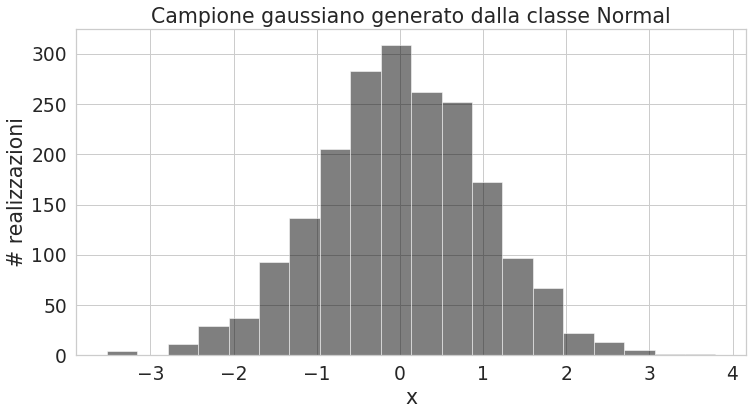

In [15]:
nsample = Normal.sample(2000, 0, 1)

plt.figure(figsize=(12,6))
plt.title('Campione gaussiano generato dalla classe Normal')
plt.hist(nsample, color='black', alpha=0.5, bins=20, label='il mio campione')
plt.xlabel('x')
plt.ylabel('# realizzazioni')
plt.show()

### 1.7 - Class 2

In [174]:
class Polynomial:
    
    def __init__(self, deg):
        self.deg  = deg
        self._pars = [0.0]*(deg+1)
        
    def set_parameters(self, parameters):
        print('Hai deciso di cambiare i parametri. I vecchi parametri erano', self._pars)
        self._pars = parameters
        print('I nuovi parametri sono', self._pars)
        
    def get_parameters(self):
        return self._pars
    
    def show_poly(self):
        for i in range(len(self._pars)):
            print(self._pars[i], "x^{", i, "}")
        return
    
    def execute(self, x):
        y = 0.0
        for i in range(self.deg+1):
            y += self._pars[i]*(x**i)
        return y
    
    def __call__(self, x):
        return self.execute(x)
    
    @property
    def parameters(self):
        return self._parameters(self, p)
    
    #@parameters.setter
    #def parameters(self)

In [175]:
P1 = Polynomial(1)

P3 = Polynomial(3)

Hai deciso di cambiare i parametri. I vecchi parametri erano [12, -8]
I nuovi parametri sono [3, 1]
Hai deciso di cambiare i parametri. I vecchi parametri erano [10, -3, -0.4, -0.03]
I nuovi parametri sono [10, -3, -0.4, -0.03]
Hai deciso di cambiare i parametri. I vecchi parametri erano [3, 1]
I nuovi parametri sono [12, -8]


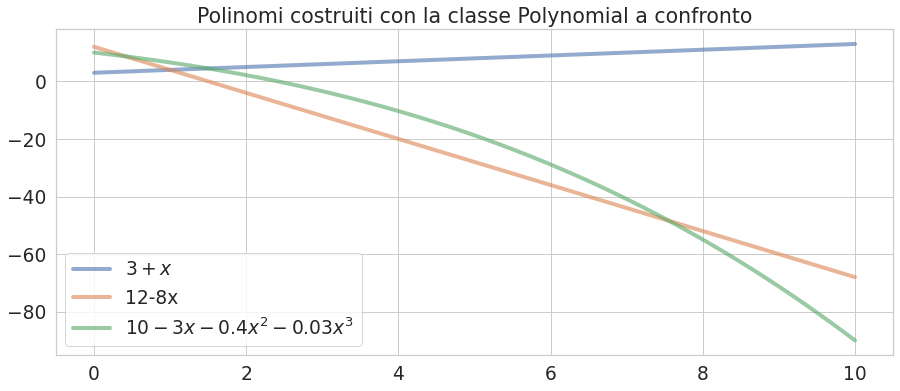

In [182]:
P1.set_parameters([3,1])
P3.set_parameters([10,-3,-0.4,-0.03])

X   = np.linspace(0,10,100)
Y_1 = P1.execute(X)

P1.set_parameters([12,-8])

Y_2 = P1.execute(X)

plt.figure(figsize=(15,6))
plt.title('Polinomi costruiti con la classe Polynomial a confronto')
plt.plot(X, Y_1, label=r'$3+x$', linewidth=4, alpha=0.6)
plt.plot(X, Y_2, label=r'12-8x', linewidth=4, alpha=0.6)
plt.plot(X, P3.execute(X), label=r'$10-3x-0.4x^2-0.03x^3$', linewidth=4, alpha=0.6)
plt.legend()
plt.show()

### 1.8 - NumPy

In [58]:
N = 10

In [103]:
v = np.float64(np.random.rand(N))

A = np.random.rand(N,N)
B = np.random.rand(N,N)

In [110]:
@jit(nopython=True)

def dot_prod(A, B):
    
    dim1 = A.shape[0]
    dim2 = B.shape[1]
    C = np.zeros((dim1, dim2))
    
    for i in range(dim1):
        for j in range(dim2):
            somma = 0;
            for k in range(dim2):
                somma += A[i][k] * B[k][j]
            C[i][j] = somma
            
    return C

In [111]:
%time

C = dot_prod(A,B)

C

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.15 µs


array([[2.08244398, 2.69672348, 2.83905723, 3.16989962, 2.34601118,
        2.87057123, 2.17761526, 2.65591224, 2.87587971, 2.11984229],
       [2.08213087, 2.32799434, 1.95693779, 2.97733417, 1.18930078,
        1.82470632, 1.81408493, 2.28541302, 2.63655385, 2.50271464],
       [2.05053048, 1.86515174, 2.33241442, 2.69824861, 1.40950924,
        2.22593509, 1.42734389, 2.35175354, 2.49951817, 1.93721947],
       [1.84855864, 3.29820186, 2.81889187, 4.01796462, 1.98826479,
        3.04014798, 2.00848793, 2.95996215, 3.54750563, 3.14411291],
       [2.50414502, 3.75409881, 2.89202864, 4.10301663, 2.46753501,
        3.12508446, 2.28992554, 3.40336643, 3.55593448, 3.29441274],
       [2.44404694, 2.2241937 , 2.51866957, 2.691555  , 2.12520874,
        2.62617868, 1.86316756, 2.75040022, 2.5876973 , 1.8804525 ],
       [2.3517115 , 3.05736429, 2.66793331, 3.75440891, 1.98749782,
        2.7805638 , 2.12869679, 3.14595218, 3.26850824, 2.84687142],
       [2.2265998 , 3.70749506, 2.6333957

In [112]:
%time

C = np.dot(A,B)

C

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs


array([[2.08244398, 2.69672348, 2.83905723, 3.16989962, 2.34601118,
        2.87057123, 2.17761526, 2.65591224, 2.87587971, 2.11984229],
       [2.08213087, 2.32799434, 1.95693779, 2.97733417, 1.18930078,
        1.82470632, 1.81408493, 2.28541302, 2.63655385, 2.50271464],
       [2.05053048, 1.86515174, 2.33241442, 2.69824861, 1.40950924,
        2.22593509, 1.42734389, 2.35175354, 2.49951817, 1.93721947],
       [1.84855864, 3.29820186, 2.81889187, 4.01796462, 1.98826479,
        3.04014798, 2.00848793, 2.95996215, 3.54750563, 3.14411291],
       [2.50414502, 3.75409881, 2.89202864, 4.10301663, 2.46753501,
        3.12508446, 2.28992554, 3.40336643, 3.55593448, 3.29441274],
       [2.44404694, 2.2241937 , 2.51866957, 2.691555  , 2.12520874,
        2.62617868, 1.86316756, 2.75040022, 2.5876973 , 1.8804525 ],
       [2.3517115 , 3.05736429, 2.66793331, 3.75440891, 1.98749782,
        2.7805638 , 2.12869679, 3.14595218, 3.26850824, 2.84687142],
       [2.2265998 , 3.70749506, 2.6333957

### 1.9 - Matplotlib

In [85]:
x_9 = np.linspace(0,5,100)

In [87]:
y_9 = np.exp(-x_9)*np.cos(2*np.pi*x_9)

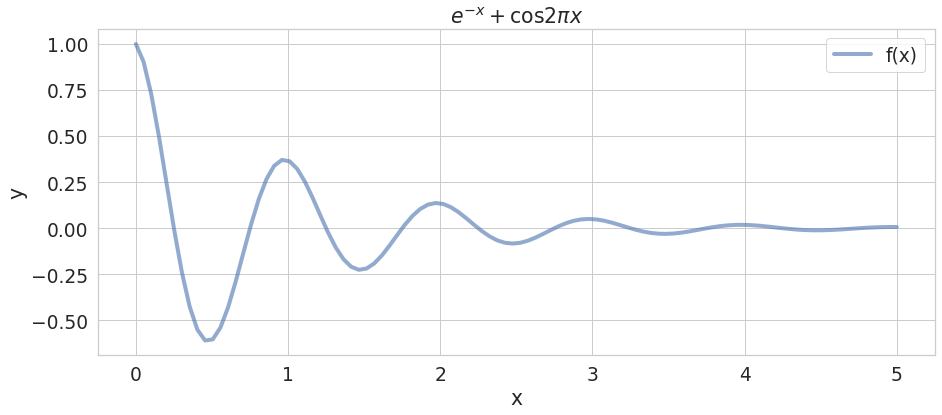

In [115]:
plt.figure(figsize=(15,6))
plt.plot(x_9, y_9, linewidth=4, alpha=0.6, label='f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(r'$e^{-x}+\cos{2\pi x}$')
plt.show()

### 1.10 - Pandas

In [118]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [119]:
dates = pd.date_range('20130101', periods=6)
print(dates)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

print(df)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2013-01-01  0.522920  0.513201 -0.531867 -0.649803
2013-01-02  0.133859 -1.011452 -1.897845 -0.131419
2013-01-03 -0.143407 -0.453143 -0.320289  0.000895
2013-01-04  0.759268 -1.209735  0.093859  0.168948
2013-01-05  0.431078  0.999044  0.466589  2.730113
2013-01-06  0.924871 -1.564521 -2.082367 -1.155516


In [121]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                        na_values='?', comment='\t',
                        sep=' ', skipinitialspace=True)

In [124]:
raw_dataset.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [130]:
raw_dataset.mean()

MPG               23.514573
Cylinders          5.454774
Displacement     193.425879
Horsepower       104.469388
Weight          2970.424623
Acceleration      15.568090
Model Year        76.010050
Origin             1.572864
dtype: float64

In [135]:
cylindthree = raw_dataset[raw_dataset['Cylinders']==3]
cylindthree

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
71,19.0,3,70.0,97.0,2330.0,13.5,72,3
111,18.0,3,70.0,90.0,2124.0,13.5,73,3
243,21.5,3,80.0,110.0,2720.0,13.5,77,3
334,23.7,3,70.0,100.0,2420.0,12.5,80,3
